<a href="https://colab.research.google.com/github/Saransh11-stack/Unsupervised_Learning/blob/main/Unsupervised_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Importing the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmn
from sklearn.preprocessing import LabelEncoder as lb
from sklearn.preprocessing import StandardScaler as ss ,normalize

**Uploading our csv file**

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving credit_card.csv to credit_card.csv


In [ ]:
df=pd.read_csv("credit_card.csv") #the csv file is stored in a dataframe df
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.isnull().sum() #checking which features have null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Since null values are present we replace them with the means of those columns**

In [ ]:
df["CREDIT_LIMIT"].fillna(df['CREDIT_LIMIT'].mean(), inplace = True)
df["MINIMUM_PAYMENTS"].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [ ]:
df.isnull().sum() #null values removed

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.dtypes #all features are in int or float other than CUST_ID which we can ignore as it has no effect on our model.

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

**We store the features in a variable x as a 2d numpy array**

In [ ]:
x=df.iloc[:,1:].values
print(x.shape)

(8950, 17)


**Standardisation and Normalisation**

In [ ]:
x_s= ss()
df_st= x_s.fit_transform(x)
df_n = normalize(df_st)


**PCA is applied so as to reduce the number of features**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
new_x = pca.fit_transform(df_n)

Text(0, 0.5, 'Cumulative_exp_var')

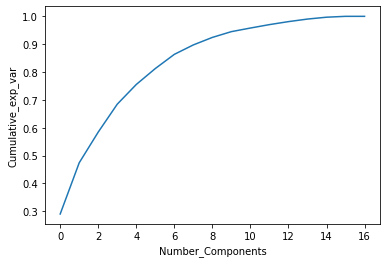

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number_Components')
plt.ylabel('Cumulative_exp_var')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)


array([0.29040871, 0.47431924, 0.58458547, 0.68473945, 0.75540641,
       0.81262041, 0.8635425 , 0.89746337, 0.92437162, 0.9450988 ,
       0.95801432, 0.97030931, 0.98104999, 0.99022002, 0.99688281,
       0.99999881, 1.        ])

In [ ]:
pca_1 = PCA(2) #we apply for a value of 2 for better visualisation
pca_1.fit(df_n)
df_pca = pca_1.fit_transform(new_x)

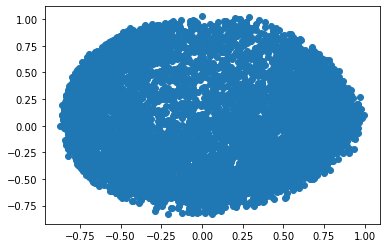

In [ ]:
plt.scatter(df_pca[:,0], df_pca[:,1])


**We install a library caleed Yellowbricks which makes visualisation easier and enables quicker model selection**

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 8.3 MB/s 


**We use the functions provided by the library to find out the optimal value of k(number of clusters)**

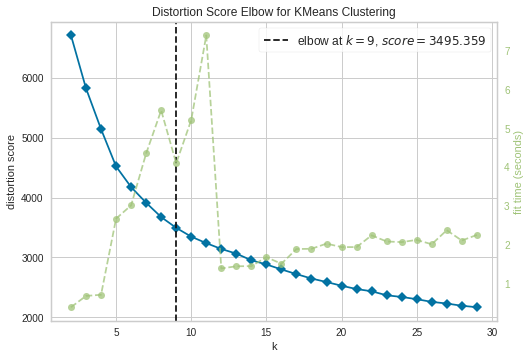

In [ ]:
from yellowbrick.cluster import KElbowVisualizer as KEV
m = kmn()
# k is range of number of clusters.
visual = KEV(m, k=(2,30), timings= True)
visual.fit(new_x)
visual.show()

In [ ]:
kmeans = kmn(n_clusters=9, random_state=0)
kmeans.fit(df_pca)

KMeans(n_clusters=9, random_state=0)

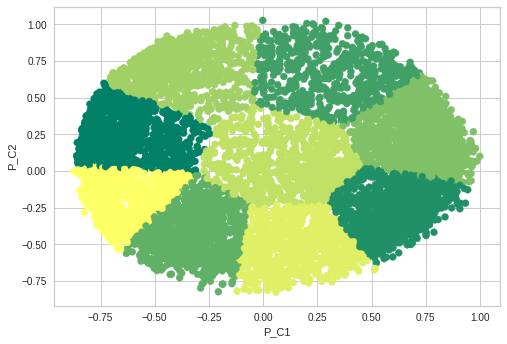

In [ ]:
plt.scatter(df_pca[:,0], df_pca[:,1],
            c = kmn(n_clusters = 9).fit_predict(df_pca),
            cmap = plt.cm.summer)
plt.xlabel("P_C1")
plt.ylabel("P_C2")

plt.show()